# <p style='text-align: center;'> Introduction to Sequence to Sequence Models </p>

## Introduction:
Sequence to Sequence (often abbreviated to seq2seq) models is a special class of Recurrent Neural Network architectures that we typically use (but not restricted) to solve complex Language problems like Machine Translation, Question Answering, creating Chatbots, Text Summarization, etc.

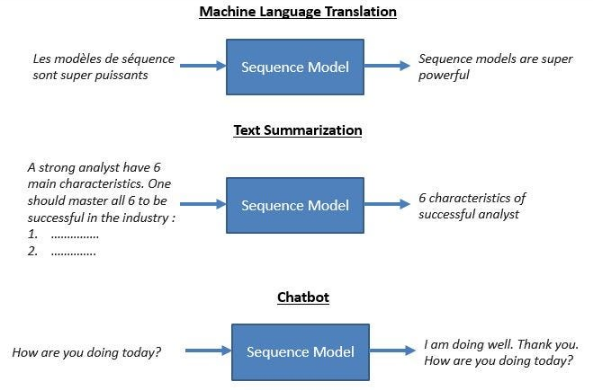



## Use Cases of the Sequence to Sequence Models
Sequence to sequence models lies behind numerous systems that you face on a daily basis. For instance, seq2seq model powers applications like Google Translate, voice-enabled devices, and online chatbots. The following are some of the applications:

- **Machine translation** — a 2016 paper from Google shows how the seq2seq model’s translation quality “approaches or surpasses all currently published results”.

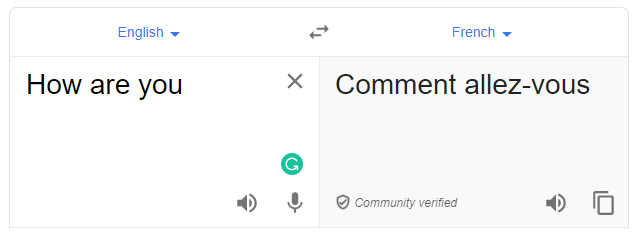

Speech recognition — another Google paper that compares the existing seq2seq models on the speech recognition task.

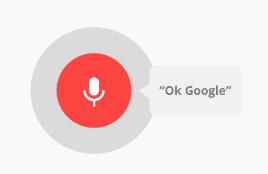

These are only some applications where seq2seq is seen as the best solution. This model can be used as a solution to any sequence-based problem, especially ones where the inputs and outputs have different sizes and categories


We will talk more about the model structure below.

## Encoder-Decoder Architecture:
The most common architecture used to build Seq2Seq models is Encoder-Decoder architecture.

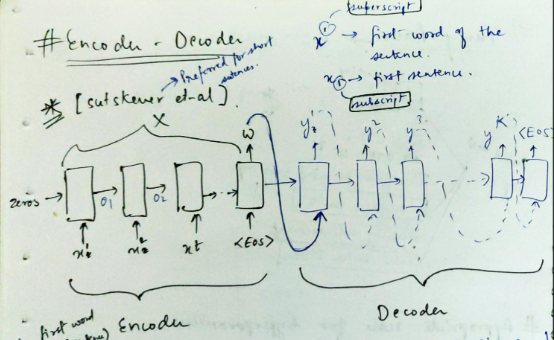

As the name implies, there are two components — an **encoder** and a **decoder**.

## Encoder :
- Both encoder and the decoder are LSTM models (or sometimes GRU models).


- Encoder reads the input sequence and summarizes the information in something called the internal state vectors or context vector (in case of LSTM these are called the hidden state and cell state vectors). We discard the outputs of the encoder and only preserve the internal states. This context vector aims to encapsulate the information for all input elements in order to help the decoder make accurate predictions.


- The hidden states h_i are computed using the formula:

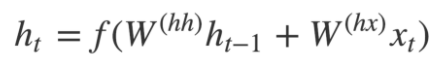

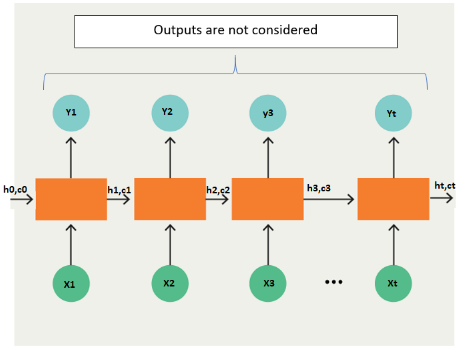

The LSTM reads the data, one sequence after the other. Thus if the input is a sequence of length ‘t’, we say that LSTM reads it in ‘t’ time steps.

1. Xi = Input sequence at time step i.


2. hi and ci = LSTM maintains two states (‘h’ for hidden state and ‘c’ for cell state) at each time step. Combined together these are internal state of the LSTM at time step i.


3. Yi = Output sequence at time step i. Yi is actually a probability distribution over the entire vocabulary which is generated by using a softmax activation. Thus each Yi is a vector of size “vocab_size” representing a probability distribution.

## Decoder :
- The decoder is an LSTM whose initial states are initialized to the final states of the Encoder LSTM, i.e. the context vector of the encoder’s final cell is input to the first cell of the decoder network. Using these initial states, the decoder starts generating the output sequence, and these outputs are also taken into consideration for future outputs.


- A stack of several LSTM units where each predicts an output y_t at a time step t.


- Each recurrent unit accepts a hidden state from the previous unit and produces and output as well as its own hidden state.


- Any hidden state h_i is computed using the formula:

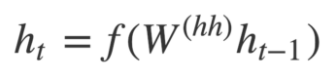

- The output y_t at time step t is computed using the formula:

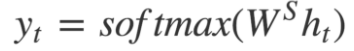

- We calculate the outputs using the hidden state at the current time step together with the respective weight W(S). Softmax is used to create a probability vector which will help us determine the final output (e.g. word in the question-answering problem).

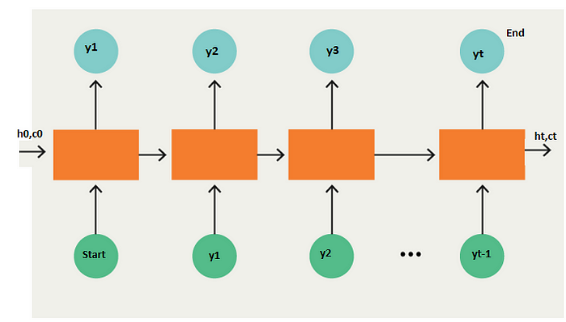

We will add two tokens in the output sequence as follows:

### Example:

“**START_** John is hard working **_END**”.

The most important point is that the initial states (h0, c0) of the decoder are set to the final states of the encoder. This intuitively means that the decoder is trained to start generating the output sequence depending on the information encoded by the encoder.

Finally, the loss is calculated on the predicted outputs from each time step and the errors are backpropagated through time in order to update the parameters of the network. Training the network over a longer period with a sufficiently large amount of data results in pretty good predictions.

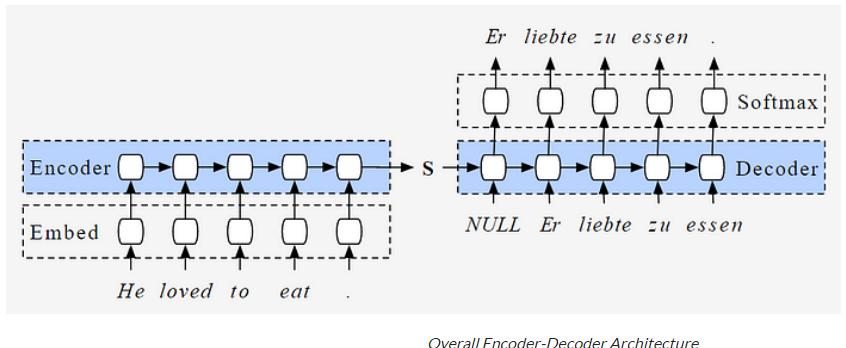

- During inference, we generate one word at a time.


- The initial states of the decoder are set to the final states of the encoder.


- The initial input to the decoder is always the START token.


- At each time step, we preserve the states of the decoder and set them as initial states for the next time step.


- At each time step, the predicted output is fed as input in the next time step.


- We break the loop when the decoder predicts the END token.

## Drawbacks of Encoder-Decoder Models :
There are two primary drawbacks to this architecture, both related to length.

1. Firstly, as with humans, this architecture has very limited memory. That final hidden state of the LSTM, which we call S or W, is where you’re trying to cram the entirety of the sentence you have to translate.S or W is usually only a few hundred units (read: floating-point numbers) long — the more you try to force into this fixed dimensionality vector, the lossier the neural network is forced to be. Thinking of neural networks in terms of the “lossy compression” they’re required to perform is sometimes quite useful.

2. Second, as a general rule of thumb, the deeper a neural network is, the harder it is to train. For recurrent neural networks, the longer the sequence is, the deeper the neural network is along the time dimension.This results in vanishing gradients, where the gradient signal from the objective that the recurrent neural network learns from disappears as it travels backward. Even with RNNs specifically made to help prevent vanishing gradients, such as the LSTM, this is still a fundamental problem.

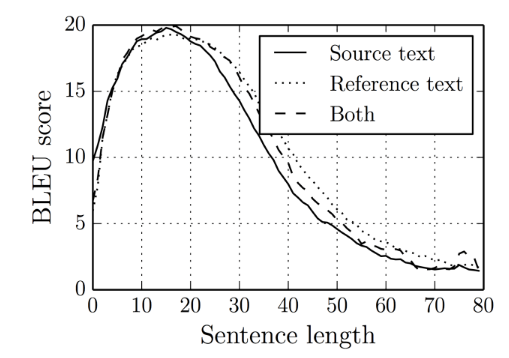

Furthermore, for more robust and lengthy sentences we have models like **Attention Models and Transformers**.